Based from DataCamp's course "Analyzing Police Activity in Rhode Island"

## Examining the dataset

Throughout this course, we'll be analyzing a dataset of traffic stops in Rhode Island that was collected by the Standford Open Policing Project. 

In [4]:
# Import the pandas library as pd
import pandas as pd

# Read 'police.csv' into a DataFrame named ri
ri = pd.read_csv('police.csv')

# Examine the head of the DataFrame
print(ri.head(5))

# Count the number of missing values in each column
print(ri.isnull().sum())

  state   stop_date stop_time  county_name driver_gender driver_race  \
0    RI  2005-01-04     12:55          NaN             M       White   
1    RI  2005-01-23     23:15          NaN             M       White   
2    RI  2005-02-17     04:15          NaN             M       White   
3    RI  2005-02-20     17:15          NaN             M       White   
4    RI  2005-02-24     01:20          NaN             F       White   

                    violation_raw  violation  search_conducted search_type  \
0  Equipment/Inspection Violation  Equipment             False         NaN   
1                        Speeding   Speeding             False         NaN   
2                        Speeding   Speeding             False         NaN   
3                Call for Service      Other             False         NaN   
4                        Speeding   Speeding             False         NaN   

    stop_outcome is_arrested stop_duration  drugs_related_stop district  
0       Citation       F

## Dropping Columns

Often, a DataFrame will contain columns that are not useful to your analysis. Such columns should be dropped from the DataFrame, to make it easier for you to focus on the remaining columns.

In this exercise, you'll drop the county_name column because it only contains missing values, and you'll drop the state column because all of the traffic stops took place in one state (Rhode Island). Thus, these columns can be dropped because they contain no useful information.

In [5]:
# Count the number of missing values in each column
print(ri.isnull().sum())

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64


In [6]:
#Examine the shape of the DataFrame
print(ri.shape)

(91741, 15)


In [7]:
#Drop the 'county_name' and 'state' column
ri.drop(['county_name', 'state'], axis = 'columns', inplace = True)

In [8]:
print(ri.shape)

(91741, 13)


## Dropping Rows

When you know that a specific column will be critical to your analysis, and only a small fraction of rows are missing a value in that column, it often makes sense to remove those rows from the dataset.

During this course, the driver_gender column will be critical to many of your analyses. Because only a small fraction of rows are missing driver_gender, we'll drop those rows from the dataset.

In [9]:
# Count the number of missing values in each column
print(ri.isnull().sum())

stop_date                 0
stop_time                 0
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64


In [10]:
# Drop all rows that are missing 'driver_gender'
ri.dropna(subset=['driver_gender'], inplace = True)

In [11]:
# Count the number of missing values in each column (again)
print(ri.isnull().sum())

stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64


In [12]:
# Examine the shape of the DataFrame
print(ri.shape)

(86536, 13)


## Finding an incorrect data type

In [13]:
ri.dtypes

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

In [14]:
#is_arrested should have a data type of bool

## Fixing a data type

Previously, is_arrested column has the object data type which needs to be changed to bool data type. 

In [15]:
# Examine the head of the 'is_arrested' column
print(ri.is_arrested.head(5))

0    False
1    False
2    False
3     True
4    False
Name: is_arrested, dtype: object


In [16]:
# Check the data type of 'is_arrested'
print(ri.is_arrested.dtype)

object


In [17]:
# Change the data type of 'is_arrested' to 'bool'
ri['is_arrested'] = ri.is_arrested.astype('bool')

In [18]:
# Check the data type of 'is_arrested' (again)
print(ri.is_arrested.dtype)

bool


## Combining object columns

Combine stop_date and stop_time into a single column and convert it into datetime format. 

In [19]:
# Concatenate 'stop_date' and 'stop_time' (separated by a space)
combined = ri.stop_date.str.cat(ri.stop_time, sep = ' ')

In [20]:
# Convert 'combined' to datetime format
ri['stop_datetime'] = pd.to_datetime(combined)

In [21]:
# Examine the data types of the DataFrame
print(ri.dtypes)

stop_date                     object
stop_time                     object
driver_gender                 object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object


## Setting the index

Set the stop_datetime column as the DataFrame's index. By replacing the default index with a DatetimeIndex, you'll make it easier to analyze the dataset by date and time, which will come in handy later. 

In [22]:
# Set 'stop_datetime' as the index
ri.set_index('stop_datetime', inplace = True)

In [23]:
# Examine the index
print(ri.index)

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-12-31 13:23:00', '2015-12-31 18:59:00',
               '2015-12-31 19:13:00', '2015-12-31 20:20:00',
               '2015-12-31 20:50:00', '2015-12-31 21:21:00',
               '2015-12-31 21:59:00', '2015-12-31 22:04:00',
               '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=86536, freq=None)


In [24]:
# Examine the columns
print(ri.columns)

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district'],
      dtype='object')


## Examining Traffic Violations

Before comparing the violations being committed by each gender,  examine the violations committed by all drivers to get a baseline understanding of the data. Count the unique values in the violation column, and then separately express those counts as proportions.

In [25]:
# Count the unique values in 'violation'
print(ri.violation.value_counts())

Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64


In [26]:
# Express the counts as proportions
print(ri.violation.value_counts(normalize=True))

Speeding               0.559571
Moving violation       0.187483
Equipment              0.126202
Other                  0.050950
Registration/plates    0.042791
Seat belt              0.033004
Name: violation, dtype: float64


## Comparing violations by gender

The question we're trying to answer is whether male and female drivers tend to commit different types of traffic violations. First, create a DataFrame for each gender, and then analyze the violations in each DataFrame separately.

In [27]:
# Create a DataFrame of female drivers
female = ri[ri.driver_gender == 'F']

In [28]:
# Create a DataFrame of male drivers
male = ri[ri.driver_gender == 'M']

In [29]:
# Compute the violations by female drivers (as proportions)
print(female.violation.value_counts(normalize = True))

Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64


In [30]:
# Compute the violations by male drivers (as proportions)
print(male.violation.value_counts(normalize = True))

Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64


About two-thirds of female traffic stops are for speeding, whereas stops of males are more balanced among the six categories. This doesn't mean that females speed more often than males, however, since we didn't take into account the number of stops or drivers.

## Comparing speeding outcomes by gender

When a driver is pulled over for speeding, many people believe that gender has an impact on whether the driver will receive a ticket or a warning. Let's find evidence of this in the dataset.

First, create two DataFrames of drivers who were stopped for speeding: one containing females and the other containing males.

Then, for each gender, use the stop_outcome column to calculate what percentage of stops resulted in a "Citation" (meaning a ticket) versus a "Warning".

In [31]:
# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = ri[(ri.driver_gender == 'F') & (ri.violation == 'Speeding')]

In [32]:
# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = ri[(ri.driver_gender == 'M') & (ri.violation == 'Speeding')]

In [33]:
# Compute the stop outcomes for female drivers (as proportions)
print(female_and_speeding.stop_outcome.value_counts(normalize=True))

Citation            0.952192
Warning             0.040074
Arrest Driver       0.005752
N/D                 0.000959
Arrest Passenger    0.000639
No Action           0.000383
Name: stop_outcome, dtype: float64


In [34]:
# Compute the stop outcomes for male drivers (as proportions)
print(male_and_speeding.stop_outcome.value_counts(normalize=True))

Citation            0.944595
Warning             0.036184
Arrest Driver       0.015895
Arrest Passenger    0.001281
No Action           0.001068
N/D                 0.000976
Name: stop_outcome, dtype: float64


The numbers are similar for males and females: about 95% of stops for speeding result in a ticket. Thus, the data fails to show that gender has an impact on who gets a ticket for speeding.

## Calculating the search rate

During a traffic stop, the police officer sometimes conducts a search of the vehicle. Calculate the percentage of all stops that result in a vehicle search, also known as the search rate.

In [35]:
# Check the data type of 'search_conducted'
print(ri.search_conducted.dtype)

bool


In [36]:
# Calculate the search rate by counting the values
print(ri.search_conducted.value_counts(normalize=True))

False    0.961785
True     0.038215
Name: search_conducted, dtype: float64


In [37]:
# Calculate the search rate by taking the mean
print(ri.search_conducted.mean())

0.0382153092354627


It looks like the search rate is about 3.8%. Next, examine whether the search rate varies by driver gender.

## Comparing search rates by gender

Compare the rates at which female and male drivers are searched during a traffic stop. Remember that the vehicle search rate across all stops is about 3.8%.

First, filter the DataFrame by gender and calculate the search rate for each group separately. Then, perform the same calculation for both genders at once using a .groupby().

In [38]:
# Calculate the search rate for female drivers
print(ri[ri.driver_gender == 'F'].search_conducted.mean())

0.019180617481282074


In [39]:
# Calculate the search rate for male drivers
print(ri[ri.driver_gender == 'M'].search_conducted.mean())

0.04542557598546892


In [40]:
# Calculate the search rate for both groups simultaneously
print(ri.groupby('driver_gender').search_conducted.mean())

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64


Male drivers are searched more than twice as often as female drivers. Why might this be?

## Adding a second factor to the analysis

Even though the search rate for males is much higher than for females, it's possible that the difference is mostly due to a second factor.

For example, we might hypothesize that the search rate varies by violation type, and the difference in search rate between males and females is because they tend to commit different violations.

We can test this hypothesis by examining the search rate for each combination of gender and violation. If the hypothesis was true, we would find that males and females are searched at about the same rate for each violation. Find out below if that's the case!

In [41]:
# Calculate the search rate for each combination of gender and violation
print(ri.groupby(['driver_gender','violation']).search_conducted.mean())

driver_gender  violation          
F              Equipment              0.039984
               Moving violation       0.039257
               Other                  0.041018
               Registration/plates    0.054924
               Seat belt              0.017301
               Speeding               0.008309
M              Equipment              0.071496
               Moving violation       0.061524
               Other                  0.046191
               Registration/plates    0.108802
               Seat belt              0.035119
               Speeding               0.027885
Name: search_conducted, dtype: float64


In [42]:
# Reverse the ordering to group by violation before gender
print(ri.groupby(['violation', 'driver_gender']).search_conducted.mean())

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64


For all types of violations, the search rate is higher for males than for females, disproving our hypothesis.

## Counting protective frisks

During a vehicle search, the police officer may pat down the driver to check if they have a weapon. This is known as a "protective frisk."

First check to see how many times "Protective Frisk" was the only search type. Then, use a string method to locate all instances in which the driver was frisked.

In [43]:
# Count the 'search_type' values
print(ri.search_type.value_counts())

Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Probable Cause,Protective Frisk                               35
Incident to Arrest,Inventory,Probable Cause                   35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris

In [44]:
# Check if 'search_type' contains the string 'Protective Frisk'
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na=False)

In [45]:
# Check the data type of 'frisk'
print(ri.frisk.dtype)

bool


In [46]:
# Take the sum of 'frisk'
print(ri.frisk.sum())

303


 It looks like there were 303 drivers who were frisked. Next, you'll examine whether gender affects who is frisked.

## Comparing frisk rates by gender

Compare the rates at which female and male drivers are frisked during a search. Are males frisked more often than females, perhaps because police officers consider them to be higher risk?

Before doing any calculations, it's important to filter the DataFrame to only include the relevant subset of data, namely stops in which a search was conducted.

In [47]:
# Create a DataFrame of stops in which a search was conducted
searched = ri[ri.search_conducted == True]

In [48]:
# Calculate the overall frisk rate by taking the mean of 'frisk'
print(searched.frisk.mean())

0.09162382824312065


In [49]:
# Calculate the frisk rate for each gender
print(searched.groupby('driver_gender').frisk.mean())

driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64


## Calculating the hourly arrest rate

When a police officer stops a driver, a small percentage of those stops ends in an arrest. This is known as the arrest rate. Find out whether the arrest rate varies by time of day.

First, calculate the arrest rate across all stops. Then, calculate the hourly arrest rate by using the hour attribute of the index. The hour ranges from 0 to 23, in which:

0 = midnight
12 = noon
23 = 11 PM

In [50]:
# Calculate the overall arrest rate
print(ri.is_arrested.mean())

0.0355690117407784


In [51]:
# Calculate the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()
hourly_arrest_rate

stop_datetime
0     0.051431
1     0.064932
2     0.060798
3     0.060549
4     0.048000
5     0.042781
6     0.013813
7     0.013032
8     0.021854
9     0.025206
10    0.028213
11    0.028897
12    0.037399
13    0.030776
14    0.030605
15    0.030679
16    0.035281
17    0.040619
18    0.038204
19    0.032245
20    0.038107
21    0.064541
22    0.048666
23    0.047592
Name: is_arrested, dtype: float64

## Plotting the hourly arrest rate

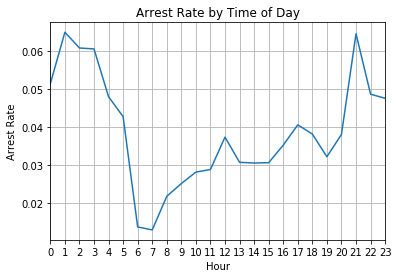

In [52]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xticks(range(0,24))
plt.xlabel("Hour")
plt.ylabel("Arrest Rate")
plt.title("Arrest Rate by Time of Day")
plt.grid()

# Display the plot
plt.show();

## Plotting drug-related stops

In a small portion of traffic stops, drugs are found in the vehicle during a search. Assess whether these drug-related stops are becoming more common over time.

The Boolean column drugs_related_stop indicates whether drugs were found during a given stop. Calculate the annual drug rate by resampling this column, and then use a line plot to visualize how the rate has changed over time.

In [53]:
# Calculate the annual rate of drug-related stops
print(ri.drugs_related_stop.resample('A').mean())

stop_datetime
2005-12-31    0.006501
2006-12-31    0.007258
2007-12-31    0.007970
2008-12-31    0.007505
2009-12-31    0.009889
2010-12-31    0.010081
2011-12-31    0.009731
2012-12-31    0.009921
2013-12-31    0.013094
2014-12-31    0.013826
2015-12-31    0.012266
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


In [54]:
# Save the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

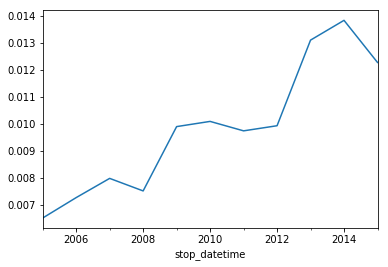

In [55]:
# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot()

In [56]:
# Display the plot
plt.show()

The rate of drug-related stops nearly doubled over the course of 10 years. Why might that be the case?

## Comparing drug and search rates

The rate of drug-related stops increased significantly between 2005 and 2015. We might hypothesize that the rate of vehicle searches was also increasing, which would have led to an increase in drug-related stops even if more drivers were not carrying drugs.

We can test this hypothesis by calculating the annual search rate, and then plotting it against the annual drug rate. If the hypothesis is true, then we'll see both rates increasing over time.

In [57]:
# Calculate and save the annual search rate
annual_search_rate = ri.search_conducted.resample('A').mean()

In [58]:
# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate, annual_search_rate], axis = 'columns')

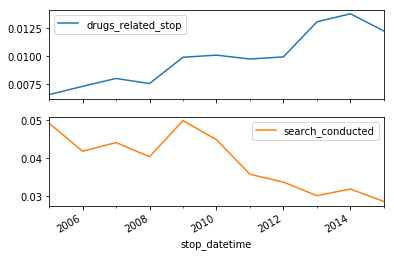

In [61]:
# Create subplots from annual
annual.plot(subplots=True)
plt.show()

 The rate of drug-related stops increased even though the search rate decreased, disproving our hypothesis.

## Tallying violations by district

The state of Rhode Island is broken into six police districts, also known as zones. How do the zones compare in terms of what violations are caught by police?

Create a frequency table to determine how many violations of each type took place in each of the six zones. Then, filter the table to focus on the "K" zones, which we'll examine further in the next exercise.

In [62]:
# Create a frequency table of districts and violations
print(pd.crosstab(ri.district, ri.violation))

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1          672              1254    290                  120          0   
Zone K2         2061              2962    942                  768        481   
Zone K3         2302              2898    705                  695        638   
Zone X1          296               671    143                   38         74   
Zone X3         2049              3086    769                  671        820   
Zone X4         3541              5353   1560                 1411        843   

violation  Speeding  
district             
Zone K1        5960  
Zone K2       10448  
Zone K3       12322  
Zone X1        1119  
Zone X3        8779  
Zone X4        9795  


In [63]:
# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(ri.district, ri.violation)

In [65]:
# Select rows 'Zone K1' through 'Zone K3'
print(all_zones.loc['Zone K1' : 'Zone K3'])

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1          672              1254    290                  120          0   
Zone K2         2061              2962    942                  768        481   
Zone K3         2302              2898    705                  695        638   

violation  Speeding  
district             
Zone K1        5960  
Zone K2       10448  
Zone K3       12322  


In [67]:
# Save the smaller table as 'k_zones'
k_zones = all_zones.loc['Zone K1' : 'Zone K3']
k_zones

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,672,1254,290,120,0,5960
Zone K2,2061,2962,942,768,481,10448
Zone K3,2302,2898,705,695,638,12322


## Plotting violations by district

Now that we've created a frequency table focused on the "K" zones, we'll visualize the data to help us compare what violations are being caught in each zone.

First, create a bar plot, which is an appropriate plot type since we're comparing categorical data. Then create a stacked bar plot in order to get a slightly different look at the data. Which plot do you find to be more insightful?

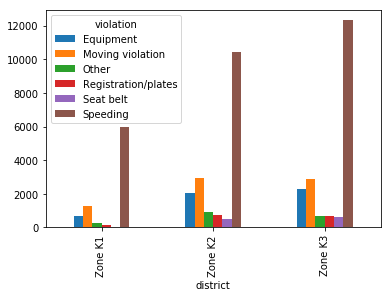

In [68]:
# Create a bar plot of 'k_zones'
k_zones.plot(kind='bar')
plt.show()

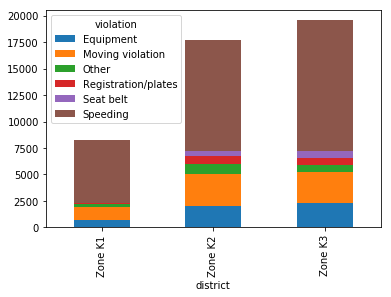

In [70]:
# Create a stacked bar plot of 'k_zones'
k_zones.plot(kind='bar', stacked=True)
plt.show()

The vast majority of traffic stops in Zone K1 are for speeding, and Zones K2 and K3 are remarkably similar to one another in terms of violations.

## Converting stop durations to numbers

In the traffic stops dataset, the stop_duration column tells you approximately how long the driver was detained by the officer. Unfortunately, the durations are stored as strings, such as '0-15 Min'. How can we make this data easier to analyze?

In this exercise, we'll convert the stop durations to integers. Because the precise durations are not available, we'll have to estimate the numbers using reasonable values:

Convert '0-15 Min' to 8
Convert '16-30 Min' to 23
Convert '30+ Min' to 45

In [71]:
# Print the unique values in 'stop_duration'
print(ri.stop_duration.unique())

['0-15 Min' '16-30 Min' '30+ Min']


In [72]:
# Create a dictionary that maps strings to integers
mapping = {'0-15 Min':8, '16-30':23, '30+ Min':45}

In [73]:
# Convert the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri.stop_duration.map(mapping)

In [74]:
# Print the unique values in 'stop_minutes'
print(ri.stop_minutes.unique())

[ 8. nan 45.]


## Plotting for stop length

If you were stopped for a particular violation, how long might you expect to be detained?

Visualize the average length of time drivers are stopped for each type of violation. Rather than using the violation column in this exercise, use violation_raw since it contains more detailed descriptions of the violations.

In [75]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
print(ri.groupby('violation_raw').stop_minutes.mean())

violation_raw
APB                                 16.457143
Call for Service                    21.661538
Equipment/Inspection Violation       9.782759
Motorist Assist/Courtesy            15.073529
Other Traffic Violation             11.654216
Registration Violation              11.002448
Seatbelt Violation                   8.383346
Special Detail/Directed Patrol      12.664362
Speeding                             8.513418
Suspicious Person                   12.933333
Violation of City/Town Ordinance     8.888000
Warrant                             24.187500
Name: stop_minutes, dtype: float64


In [76]:
# Save the resulting Series as 'stop_length'
stop_length = ri.groupby('violation_raw').stop_minutes.mean()

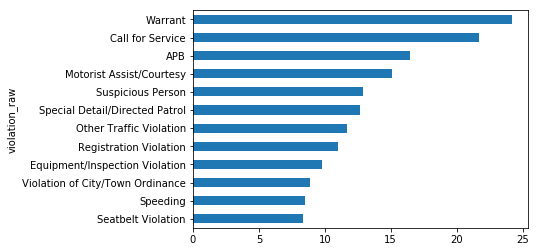

In [78]:
# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind='barh') #add h to 'bar'
plt.show()